# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [166]:
import pandas as pd;

In [167]:
# Read in the customer data
cx_data = pd.read_csv('../Data/maven_music_customers.csv')
filtered_data= cx_data[cx_data['Discount?'].notnull()]
filtered_data.head()


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
21,6822,Kiki Keys,Email: kiki.keys.piano@email.com,5/1/23,Premium (No Ads),$7.99,Yes,NaN
22,6824,Greta Groove,Email: groovy.greta@email.com,5/1/23,Premium (No Ads),$7.99,Yes,6/2/23
23,7087,Harmony Heart,Email: heartfelt.harmony@email.com,5/1/23,Premium (No Ads),$7.99,Yes,6/2/23
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,5/8/23,Premium (No Ads),$7.99,Yes,6/1/23
26,7401,Reed Murphy,Email: murphy.reed.music@email.com,5/8/23,Premium (No Ads),$7.99,Yes,6/1/23


In [168]:
cx_data.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [169]:
# Read in the listening history
cx_listen_history = pd.read_excel('../Data/maven_music_listening_history.xlsx')
cx_listen_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [170]:
# Hint: Where might you find listening history data beyond the ID's?
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=1)


In [171]:
# Read in the audio data
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [172]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=2)
session.head(2)

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [173]:
# Check the data types
cx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB


In [174]:
filtered_data= cx_data[cx_data['Discount?'].notnull()]
filtered_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
21,6822,Kiki Keys,Email: kiki.keys.piano@email.com,5/1/23,Premium (No Ads),$7.99,Yes,NaN
22,6824,Greta Groove,Email: groovy.greta@email.com,5/1/23,Premium (No Ads),$7.99,Yes,6/2/23
23,7087,Harmony Heart,Email: heartfelt.harmony@email.com,5/1/23,Premium (No Ads),$7.99,Yes,6/2/23
25,7224,Melody Fitzgerald,Email: fitzgerald.melody@email.com,5/8/23,Premium (No Ads),$7.99,Yes,6/1/23
26,7401,Reed Murphy,Email: murphy.reed.music@email.com,5/8/23,Premium (No Ads),$7.99,Yes,6/1/23


In [191]:
# Convert objects to numeric and datetime fields
#fixing date column in cx_data
cx_data['Cancellation Date'] = pd.to_datetime(cx_data['Cancellation Date'],format='%m/%d/%y')

#removing '$' subsribiton rate column in cx_data and changing it to float
cx_data['Subscription Rate'] = pd.to_numeric(cx_data['Subscription Rate'].str.replace("$",""))

#--commented this because can't run twice
#fixing 'member since' column in cx_data
cx_data['Member Since'] = pd.to_datetime(cx_data['Member Since'],format='%m/%d/%y')

In [192]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, 21 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        7 non-null      int64 
 1   Customer Name      7 non-null      object
 2   Email              7 non-null      object
 3   Member Since       7 non-null      object
 4   Subscription Plan  7 non-null      object
 5   Subscription Rate  7 non-null      object
 6   Discount?          7 non-null      object
 7   Cancellation Date  6 non-null      object
dtypes: int64(1), object(7)
memory usage: 504.0+ bytes


### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [177]:
# Look for NaN values in the data
cx_data.isnull().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [178]:
cx_listen_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


In [179]:
audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 676.0+ bytes


In [180]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


In [181]:
# The customers dataframe has null values in the fields Subscription Plan, Discount? and Cancellation Date
cx_data[cx_data['Subscription Plan'].isna()]
# Look into Subscription Plan -- all NaN Subscription Plans are $2.99


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,$2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,$2.99,NaN,2023-06-01
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,$2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,$2.99,NaN,2023-06-03
11,5827,Rhythm Franklin,Email: rhythmic.franklin@email.edu,2023-03-28,NaN,$2.99,NaN,NaT


In [182]:
cx_data[['Subscription Plan','Subscription Rate']].drop_duplicates()
# Check the unique Subscription Rates



,Subscription Plan,Subscription Rate
0,Basic (Ads),$2.99
1,NaN,$2.99
6,Premium (No Ads),$9.99
15,Premium (No Ads),$99.99
21,Premium (No Ads),$7.99


In [193]:
# It looks like the $2.99 rate is for Basic plan, so fill missing Subscription Plan values with 'Basic'
cx_data['Subscription Plan'] = cx_data['Subscription Plan'].fillna('Basic (Ads)')
cx_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [184]:
## Look into Discount? column
cx_data[['Customer ID','Discount?']].tail()


,Customer ID,Discount?
25,7224,Yes
26,7401,Yes
27,7579,NaN
28,7581,Yes
29,7583,Yes


In [185]:
cx_data['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [186]:
# Look for inconsistent text & typos


In [187]:
#Since the Discount column contains categorical value example (Yes, No) we can change it to be a numeric value.

import numpy as np
cx_data['Discount?'] = np.where(cx_data['Discount?']=='Yes',1,0)
cx_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),$2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),$2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),$2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),$2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),$2.99,0,NaT


In [188]:
# Look into Cancellation Date -- NaN seems to mean not cancelled yet -- let's leave it as is

#### ii. Inconsistent Text & Typos

In [189]:
# Look at customers -- the subscription rate looks really high

cx_data.describe()

,Customer ID,Member Since,Discount?,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,0.430183,NaN


In [194]:
# Look into the 99.99 -- looks like a typo
cx_data[cx_data['Subscription Rate']>7.99]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [ ]:
#99.99 is a typo, we need to change it to 9.99
cx_data.iloc[15,5]=9.99

In [ ]:
cx_data['Member Since'].max()

Timestamp('2023-05-16 00:00:00')

In [ ]:
# Look at listening history
cx_listen_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [ ]:
# View the data
cx_listen_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
cx_listen_history['Audio Type'].value_counts()

Audio Type
Song       463
Podcast     42
Name: count, dtype: int64

In [ ]:
# Look at the audio data
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [ ]:
audio.Genre.value_counts()

Genre
Pop           5
Hip Hop       3
Comedy        3
Country       2
Jazz          2
True Crime    2
Name: count, dtype: int64

In [ ]:
# Pop and Pop Music should be mapped to the same value
audio.Genre=np.where(audio.Genre == 'Pop Music','Pop',audio.Genre)

In [ ]:
# Look at log in time range
session['Session Log In Time'].max()

Timestamp('2023-05-31 06:03:00')

#### iii. Duplicate Rows

In [ ]:
# Look for duplicate rows
cx_data[cx_data.duplicated()]


,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [ ]:
cx_listen_history[cx_listen_history.duplicated()]

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type


In [ ]:
audio[audio.duplicated()]

,ID,Name,Genre,Popularity


In [ ]:
session[session.duplicated()]
# There seems to be no duplcated value in any of the datafreams

,Session ID,Session Log In Time


#### iv. Outliers

In [ ]:
# Look for outliers
cx_data.describe()

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,0.430183,NaN


In [ ]:
cx_listen_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [ ]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [ ]:
session.describe()
#No obvious outliers

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [196]:
# Create a 'Cancelled' column
# since the Cancellation Date column can have only 2 values we can make it numeric
cx_data['Cancelled']=np.where(cx_data['Cancellation Date'].isnull(),0,1)

In [197]:
# Create an updated 'Email' column without the Email: portion
cx_data['Email']=cx_data['Email'].str.replace('Email:','')
cx_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [208]:
cx_data.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [209]:
#View the customers who cancelled
cx_data[cx_data['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic (Ads),2.99,0,2023-06-03,1
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02,1
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02,1
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic (Ads),2.99,0,2023-06-01,1


In [210]:
# How long were customers members before they cancelled?
(cx_data['Cancellation Date']-cx_data['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [211]:
# Cancellation rate for those who had a discount
discount_yes=cx_data[cx_data['Discount?']==1]

In [212]:
# Cancellation rate for those who did not have a discount
# sum of cancelled / count of discount ppl
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

~85.7% of customers who did not get a discount cancelled their subscription.

In [213]:
# Calculate the cancellation rate for those who did not have a discount
discount_no=cx_data[cx_data['Discount?']==0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [214]:
discount_no.Cancelled.sum()/discount_no.Cancelled.count()


0.30434782608695654

Providing a discount significantly reduced cancellations — the cancellation rate dropped from 85.71% to 30.43%.

<Axes: ylabel='Cx_type'>

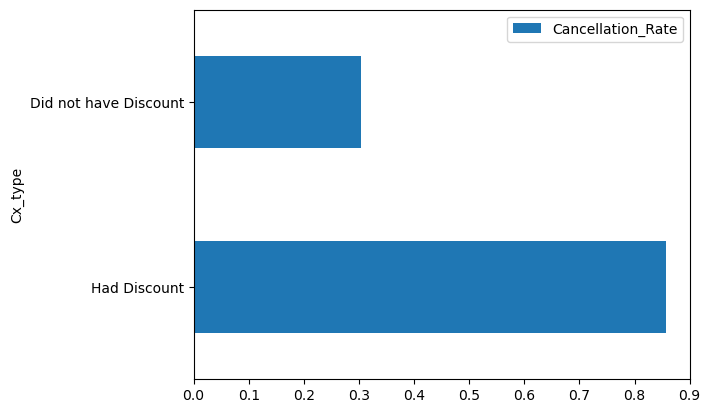

In [222]:
# Visualize the cancellation rate for those with a discount vs those without a discount
pd.DataFrame([['Had Discount', 0.8571428571428571],['Did not have Discount',0.30434782608695654]],columns=['Cx_type','Cancellation_Rate']).plot.barh(x='Cx_type',y='Cancellation_Rate')

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [225]:
cx_listen_history.head(2)

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song


In [224]:
audio.head(2)

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2


In [229]:
# Split the ID in the audio data so the column can be joined with other tables
audio_clean=pd.DataFrame(audio.ID.str.split('-').to_list()).rename(columns={0:'Type',1:'Audio ID'})
audio_clean.head(2)

,Type,Audio ID
0,Song,101
1,Song,102


In [245]:
#adding new field to the original audio table
audio_all=pd.concat([audio_clean,audio],axis=1)
audio_all.head(3
)

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2
2,Song,103,Song-103,Sunset Boulevard,Pop Music,5


In [247]:
cx_listen_history.head(3)
#now we can join audio_all and cx_listen on Audeio id


,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song


In [248]:
# If you try to join on the Audio ID, you will get an error
#df = cx_listen_history.merge(audio_all, how='left', on='Audio ID')
cx_listen_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [249]:
# Hint: Check the data type of Audio ID in the audio table
audio_all.dtypes

Type          object
Audio ID      object
ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [250]:
audio_all['Audio ID']= audio_all['Audio ID'].astype('int')
audio_all.head(2)

,Type,Audio ID,ID,Name,Genre,Popularity
0,Song,101,Song-101,Dance All Night,Pop,1
1,Song,102,Song-102,Unbreakable Beat,Pop,2


In [ ]:
#import duckdb


In [ ]:
'''
# SQL LEFT JOIN
df = duckdb.sql("""
    SELECT *
    FROM cx_listen_history
    LEFT JOIN audio_all
    ON cx_listen_history."Audio ID" = audio_all."Audio ID"
""").df()
'''


In [268]:
df

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop Music,52
...,...,...,...,...,...,...,...,...,...,...
500,7579,111282,4,111,Song,Song,Song-111,Moonlit Serenade,Jazz,63
501,6588,111286,1,201,Podcast,Podcast,Podcast-201,Jokes on Jokes,Comedy,2
502,5763,111333,1,110,Song,Song,Song-110,Boss Moves,Hip Hop,28
503,5763,111333,2,108,Song,Song,Song-108,Chase the Dream,Hip Hop,4


In [267]:
#merging data
df = cx_listen_history.merge(audio_all, how='left', on='Audio ID')

<Axes: ylabel='Frequency'>

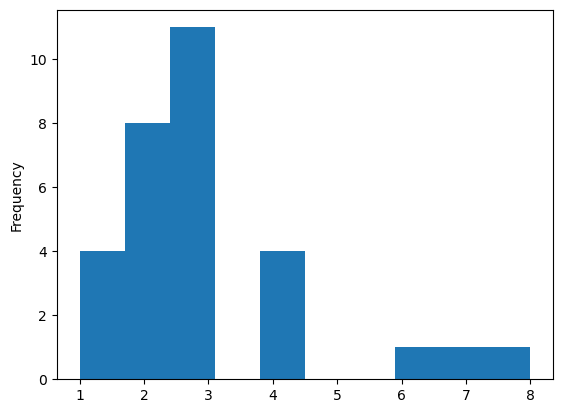

In [272]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [273]:
# The most popular genres that customers listened to
df.Genre.value_counts()

Genre
Pop Music     167
Pop           100
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [274]:
# Create a dataframe ready for modeling
model_df = cx_data[['Customer ID', 'Cancelled', 'Discount?']]
model_df.head()

,Customer ID,Cancelled,Discount?
0,5001,0,0
1,5002,0,0
2,5004,1,0
3,5267,0,0
4,5338,0,0


In [281]:
# Calculate the number of listening sessions for each customer
#df.groupby('Customer ID')['Session ID'].nunique()
df.Genre = np.where(df.Genre=='Pop Music','Pop',df.Genre)
#df.Genre.value_counts()
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song,Song-105,Pop Rocks,Pop,52


In [297]:
# Calculate the number of listening sessions for each customers
number_of_sessions=df.groupby('Customer ID')['Session ID'].nunique().rename('Number of Sessions').to_frame().reset_index()
number_of_sessions.head()

,Customer ID,Number of Sessions
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [298]:
# Add to modelling dataframe
model_df = model_df.merge(number_of_sessions, how='left', on='Customer ID')
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions
0,5001,0,0,8
1,5002,0,0,4
2,5004,1,0,1
3,5267,0,0,7
4,5338,0,0,4


In [300]:
df.Genre.value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [304]:
test=pd.get_dummies(df.Genre)
test.dtypes

Comedy        bool
Country       bool
Hip Hop       bool
Jazz          bool
Pop           bool
True Crime    bool
dtype: object

In [ ]:
#Combine it with the customer ID
#since our dummies were the dtypes as bool
pd.concat([df['Customer ID'],pd.get_dummies(df.Genre).astype('int')], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0
...,...,...,...,...,...,...,...
500,7579,0,0,0,1,0,0
501,6588,1,0,0,0,0,0
502,5763,0,0,1,0,0,0
503,5763,0,0,1,0,0,0


In [309]:
genre = pd.concat([df['Customer ID'],pd.get_dummies(df.Genre).astype('int')], axis=1).groupby('Customer ID').sum().reset_index()
genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [310]:
cx_listen_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [320]:
# Add a column for total songs/podcasts listened to
total_audio=cx_listen_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [322]:
# Create a master audio table to calculate percentages
df_audio = genre.merge(total_audio, how='left', on='Customer ID')
df_audio.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [327]:
# Percent pop
model_df['Percent Pop'] = (df_audio.Pop / df_audio['Total Audio']) * 100
model_df.head()


,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,1,0,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [328]:
# Percent podcasts
model_df['Percent Podcast'] = ((df_audio['Comedy'] + df_audio['True Crime'])/df_audio['Total Audio']) * 100
model_df.head()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcast
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,1,0,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

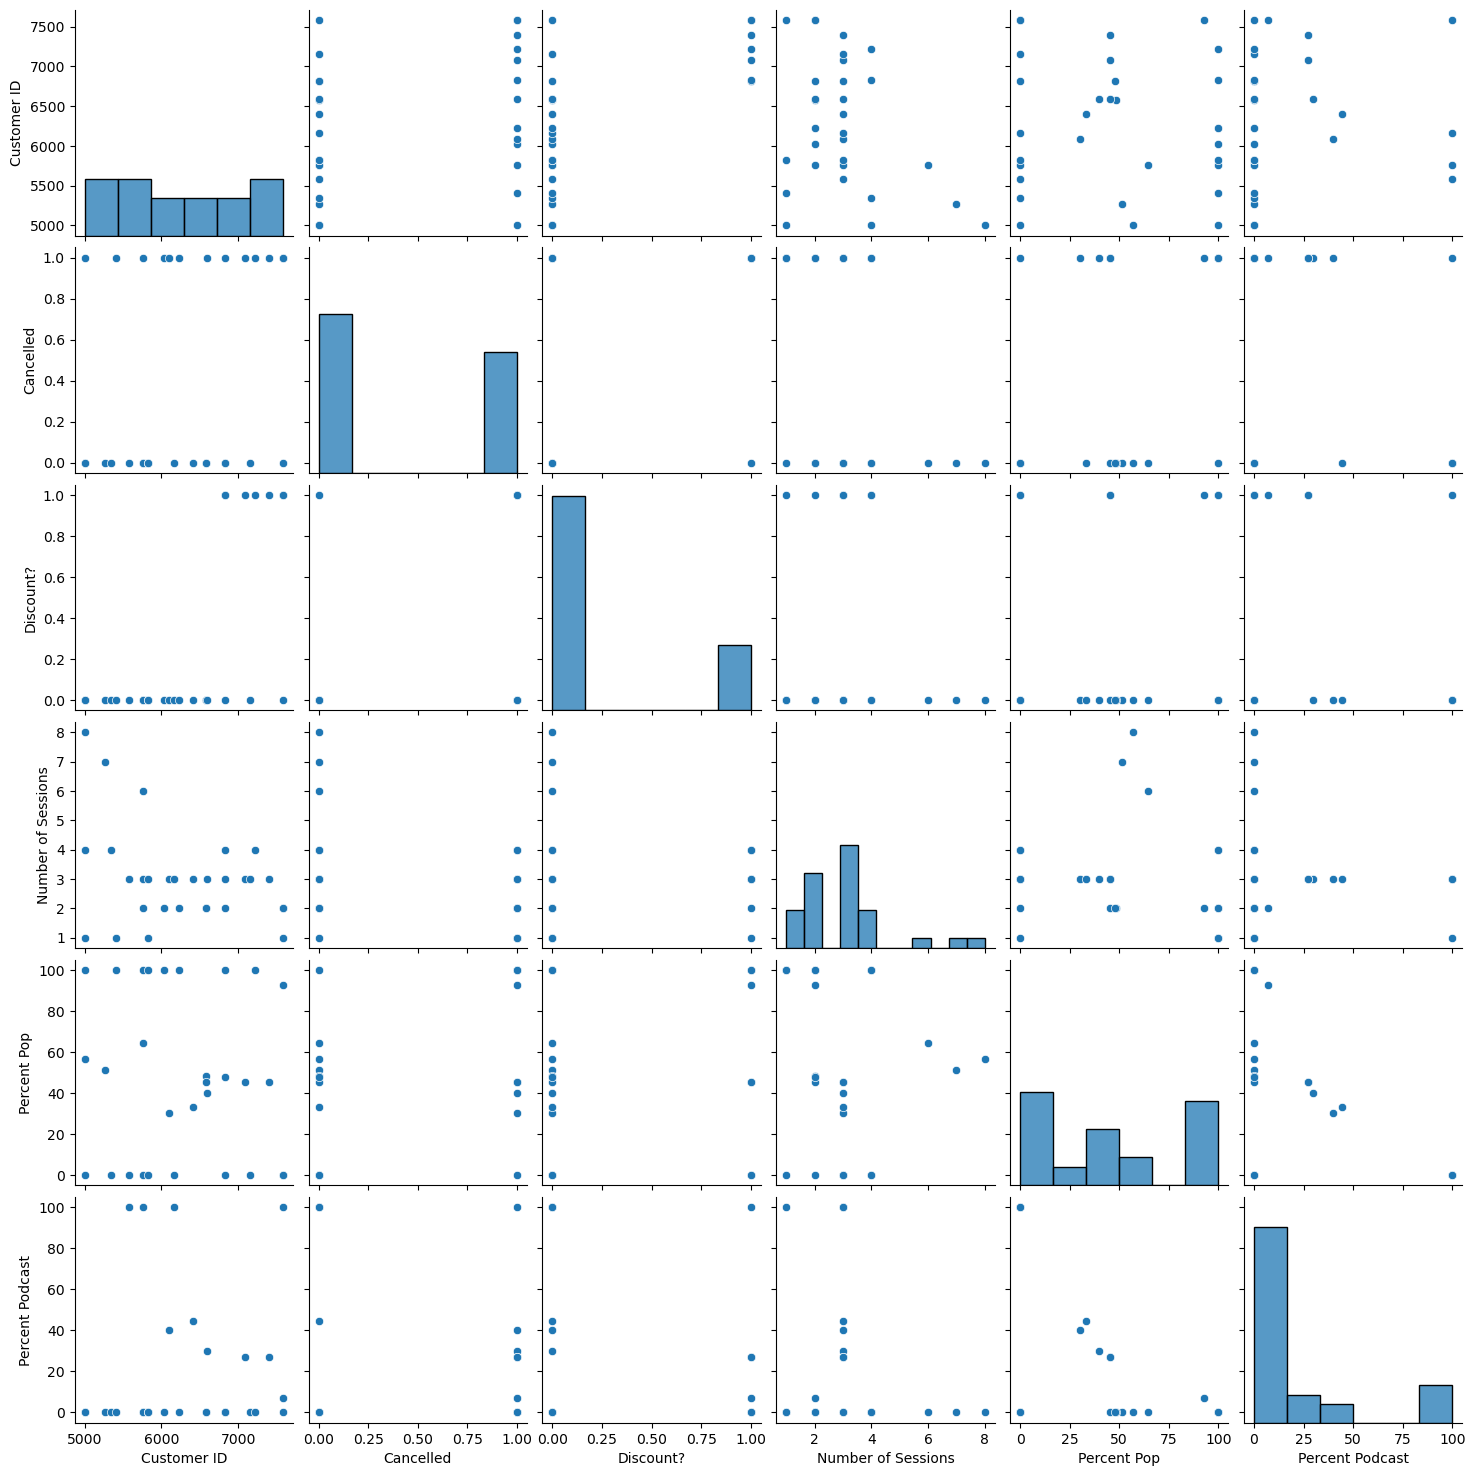

In [334]:
import seaborn as sns
sns.pairplot(model_df)

In [335]:
model_df.corr()

,Customer ID,Cancelled,Discount?,Number of Sessions,Percent Pop,Percent Podcast
Customer ID,1.000000,0.269942,0.648514,-0.337083,-0.076129,0.083083
Cancelled,0.269942,1.000000,0.471825,-0.333739,0.585630,-0.035414
Discount?,0.648514,0.471825,1.000000,-0.048877,0.112675,0.062938
Number of Sessions,-0.337083,-0.333739,-0.048877,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.585630,0.112675,-0.131156,1.000000,-0.487193
Percent Podcast,0.083083,-0.035414,0.062938,-0.125459,-0.487193,1.000000


This table shows how strongly each variable is related to another, with values ranging from:

+1 → perfect positive correlation (they increase together)

-1 → perfect negative correlation (one increases, the other decreases)

0 → no correlation (they don’t affect each other)

# Observations
## A discount is correlated with a cancellation
## The more listening sessions, the fewer cancellations
## The more pop music, the more cancellations
## Podcast listening history seems unrelated to cancellations